In [4]:
#5/6/24
#KNN testing using morganfingerprint data

import pandas as pd
import numpy as np
#Data import
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Endocrine/Morganfp.csv')
#Creating test/train splits
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(targetdata, test_size=0.2, random_state=82)
#Converts Toxicity Values to a list
temp = trainset['Toxicity_Value']#.to_list
ytrain = []
for val in temp:
    ytrain.append(val)
ytest = []
temp = testset['Toxicity_Value']#.to_list
for val in temp:
    ytest.append(val)
#Converts encoded drug target values to an array
xtrain = trainset.iloc[:, 2:]
xtest = testset.iloc[:, 2:]

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', 
                            algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
                            metric_params=None, n_jobs=None)
model= knn.fit(xtrain.values, ytrain)
preds = model.predict(xtest.values)

best mcc of  0.17848986538574144 found with n = 91


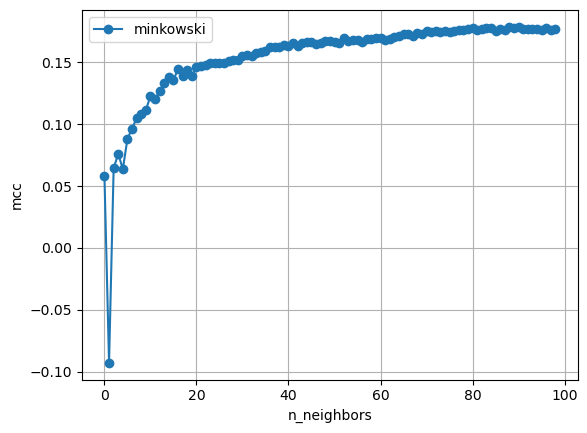

In [12]:
#Metric curve creation (Recycled from autoencoder doc)
#For individual parameter testing to get a feel for each parameters use
metriclist = []
neicount = range(1,100)
weights = ['uniform', 'distance']
algos = ['auto', 'ball_tree', 'kd_tree', 'brute']
leafsize = [10, 30, 50, 75, 100, 500]
ps = np.arange(1, 3, 0.2)
metrics = ['minkowski','cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']

maxval = 0
resultlist = []
activeparam = metrics
metriclist = []
for deg in neicount:
    knn = KNeighborsClassifier(n_neighbors=deg, weights='distance', 
                            algorithm='auto', leaf_size=100, p=2, metric='minkowski', 
                            metric_params=None, n_jobs=4)
    model= knn.fit(xtrain.values, ytrain)
    preds = model.predict(xtest.values)
    newval = metriccalc(preds, ytest)
    metriclist.append(newval)

    if newval > maxval:
        maxval = newval
        bestparam = [deg]

resultlist.append(metriclist)
        

import matplotlib.pyplot as plt
print('best mcc of ', max(metriclist), 'found with n =', bestparam[0])
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', '+', 'x', '|', '_']
loops = 0
for item in resultlist:
    plt.plot(item, label = activeparam[loops], marker = markers[loops])
    loops = loops + 1
    
plt.xlabel('n_neighbors')
plt.ylabel('mcc')
plt.legend()
plt.grid(True)
plt.show()
#Dump of all the best vars with individual param testing
#best mcc of  0.030914267741825624 found with n = 4 and current var = distance
#best mcc of  0.031175710055079568 found with n = 17 and current var = auto
#best mcc of  0.040268340942056474 found with n = 33 and current var = 100
#best mcc of  0.03643148557226515 found with n = 33 and current var = 2.5999999999999996
#best mcc of  0.03880107958559734 found with n = 33 and current var = minkowski

In [ ]:
#gargantuan for loop to test every combination of hyperparameters

metriclist = []
neicount = range(1,40)
weights = ['uniform', 'distance']
algos = ['auto', 'ball_tree', 'kd_tree', 'brute']
leafsize = [10, 30, 50, 75, 100, 500]
metrics = ['minkowski','cityblock', 'euclidean', 'l1', 'l2', 'manhattan']

#Sets active varible
#A list of lists of metrics, the index corresponds to the active variable's index
maxval = 0
bestmetrics = []

for n in neicount:
    for weight in weights:
        for algo in algos:
            for size in leafsize:
                for metric in metrics:
                    knn = KNeighborsClassifier(n_neighbors=n, weights=weight, 
                                algorithm=algo, leaf_size=size, metric=metric, 
                                metric_params=None, n_jobs=4)

                    model= knn.fit(xtrain.values, ytrain)
                    preds = model.predict(xtest.values)
                    newval = metriccalc(preds, ytest)
                    curmetrics = [n, weight, algo, size, metric]

                    if newval > maxval:
                        maxval = newval
                        bestmetrics = curmetrics

print('best metrics = ', bestmetrics, 'for mcc of', maxval)

In [13]:
correctcount = 0
fpcount = 0
tpcount = 0
tncount = 0
fncount = 0
testpos = 0
testneg = 0

iterations = 0
for value in preds:
    testscore = ytest[iterations]
    if value == 1:
        if testscore != 0:
            testpos = testpos + 1
            correctcount = correctcount + 1
            tpcount = tpcount + 1
        else:
            fpcount = fpcount + 1
            testneg = testneg + 1
    else:
        if testscore != 0:
            testpos = testpos + 1
            fncount = fncount + 1
        else:
            testneg = testneg + 1
            correctcount = correctcount + 1
            tncount = tncount + 1

    iterations = iterations + 1


print('positives in data', testpos)
print('negatives in data', testneg, '\n')

print('fn count =', fncount)
print('tn count =', tncount)

print('tp count =', tpcount)
print('fp count =', fpcount, '\n')

netfn = fncount / (fncount + tncount)
nettn = tncount / (fncount + tncount)
netacc = correctcount / (fpcount + fncount + tpcount + tncount)
posacc = tpcount / testpos
negacc = tncount / testneg
netfp = fpcount / (fpcount + tpcount)
nettp = tpcount / (tpcount + fpcount)

print('net accuracy =', netacc)
print('positive accuracy =', posacc)
print('negative accuracy =', negacc, '\n')

fpr = fpcount / (fpcount + tncount)
tpr = tpcount / (tpcount + fncount)

print('fpr =', fpr)
print('tpr =', tpr, '\n')

f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)
print('f1 score =',f1)

tp = tpcount
fp = fpcount
tn = tncount
fn = fncount

mcc = ((tp * tn) - (fp * fn)) / math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))

print('mcc =',mcc)

temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp

print('cohen Kappa =',kapp)

positives in data 1075
negatives in data 1574 

fn count = 541
tn count = 1069
tp count = 534
fp count = 505 

net accuracy = 0.6051340128350321
positive accuracy = 0.4967441860465116
negative accuracy = 0.679161372299873 

fpr = 0.32083862770012705
tpr = 0.4967441860465116 

f1 score = 0.5052034058656575
mcc = 0.17691532193305629
cohen Kappa = 0.17684431050914165


In [7]:
#function to calculate various metricsm, output changes as needed
import math
def metriccalc(preds, ytrain):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0

    iterations = 0
    for value in preds:
        testscore = ytrain[iterations]
        if value == 1:
            if testscore != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if testscore != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        iterations = iterations + 1

    #netfn = fncount / (fncount + tncount)
    #nettn = tncount / (fncount + tncount)
    #netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    #posacc = tpcount / testpos
    #negacc = tncount / testneg
    #netfp = fpcount / (fpcount + tpcount)
    #nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return 0
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    return mcc

